In [7]:
import numpy as np
import pandas as pd
from sensitivity import perturbed_run, sensitivity_analysis
from verma_net_radiation_sensitivity.verma_net_radiation_sensitivity import process_verma_net_radiation_table
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
input_df = pd.read_csv("calval_final_50_PTJPL_inputs.csv")
input_df = input_df[["Rg", "albedo", "ST_C", "EmisWB", "Ta_C", "RH"]]
input_df = input_df.dropna()
input_df

,Rg,albedo,ST_C,EmisWB,Ta_C,RH
0,0.000000,0.027717,0.89,0.972,-2.512519,1.000000
1,0.000000,0.036438,35.39,0.940,4.822851,0.630401
2,0.000000,0.077051,13.17,0.966,11.629330,0.814974
4,19.590548,0.115091,28.03,0.974,26.243547,0.556663
5,5.813275,0.123871,24.61,0.948,26.553339,0.547092
...,...,...,...,...,...,...
244,0.000000,0.109698,1.15,0.970,5.191363,0.420223
245,0.000000,0.059555,8.09,0.956,12.657937,0.599936
246,63.251832,0.115424,29.33,0.974,29.333225,0.609216
247,32.857876,0.162858,26.43,0.962,29.102583,0.696927


In [3]:
run_df = perturbed_run(input_df, "ST_C", "Rn", process_verma_net_radiation_table)
run_df

,input_variable,output_variable,input_unperturbed,input_perturbation,input_perturbation_std,input_perturbed,output_unperturbed,output_perturbation,output_perturbation_std,output_perturbed
0,ST_C,Rn,0.89,-12.224882,-1.846173,-11.334882,0.000000,0.0,0.0,0.000000
1,ST_C,Rn,0.89,-9.695695,-1.464221,-8.805695,0.000000,0.0,0.0,0.000000
2,ST_C,Rn,0.89,-4.786792,-0.722890,-3.896792,0.000000,0.0,0.0,0.000000
3,ST_C,Rn,0.89,-7.145783,-1.079140,-6.255783,0.000000,0.0,0.0,0.000000
4,ST_C,Rn,0.89,-0.262209,-0.039598,0.627791,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
17395,ST_C,Rn,30.71,6.750828,1.019494,37.460828,232.088111,0.0,0.0,232.088111
17396,ST_C,Rn,30.71,-6.103229,-0.921695,24.606771,232.088111,0.0,0.0,232.088111
17397,ST_C,Rn,30.71,16.380250,2.473707,47.090250,232.088111,0.0,0.0,232.088111
17398,ST_C,Rn,30.71,1.997100,0.301597,32.707100,232.088111,0.0,0.0,232.088111


In [4]:
np.nanmean(run_df.output_perturbation_std)

0.017616031124689523

In [6]:
input_variables = ["ST_C", "EmisWB", "albedo", "Rg", "Ta_C", "RH"]
output_variables = ["Rn"]

perturbation_df, sensitivity_metrics_df = sensitivity_analysis(
    input_df=input_df,
    input_variables=input_variables,
    output_variables=output_variables,
    forward_process=process_verma_net_radiation_table
)

sensitivity_metrics_df

/Users/halverso/Projects/ET-Sensitivity/sensitivity/sensitvity.py:117: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perturbation_df = pd.concat([perturbation_df, run_results])
/Users/halverso/Projects/ET-Sensitivity/sensitivity/sensitvity.py:123: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  sensitivity_metrics_df = pd.concat([sensitivity_metrics_df, pd.DataFrame([[


,input_variable,output_variable,metric,value
0,ST_C,Rn,correlation,-0.331068
0,ST_C,Rn,r2,0.109606
0,EmisWB,Rn,correlation,-0.182083
0,EmisWB,Rn,r2,0.033154
0,albedo,Rn,correlation,-0.465537
0,albedo,Rn,r2,0.216724
0,Rg,Rn,correlation,0.877139
0,Rg,Rn,r2,0.769373
0,Ta_C,Rn,correlation,0.460130
0,Ta_C,Rn,r2,0.211720


/var/folders/hk/35_x93nx79vg1zmd2fy1vcbr0000gq/T/ipykernel_59317/2022254417.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Surface\nTemperature", "Emissivity", "Albedo", "Solar\nRadiation", "Air\nTemperature", "Humidity"])


Text(0.5, 1.0, 'Verma Net Radiation Sensitivity')

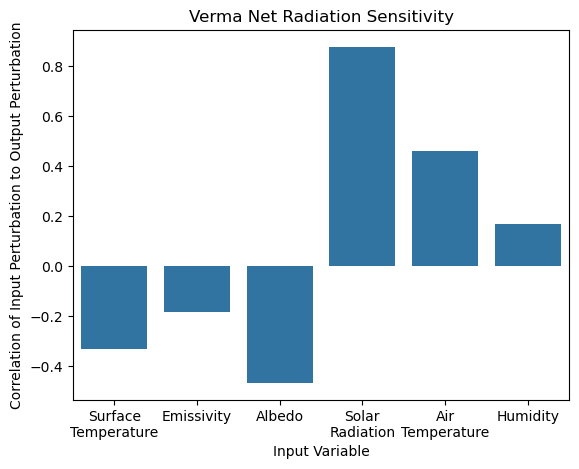

In [9]:
df = sensitivity_metrics_df
df = df[(df.output_variable == "Rn") & (df.metric == "correlation")]
df = df.dropna()
ax = sns.barplot(x=df.input_variable, y=df.value)
ax.set_xticklabels(["Surface\nTemperature", "Emissivity", "Albedo", "Solar\nRadiation", "Air\nTemperature", "Humidity"])
plt.xlabel("Input Variable")
plt.ylabel("Correlation of Input Perturbation to Output Perturbation")
plt.title("Verma Net Radiation Sensitivity")

/var/folders/hk/35_x93nx79vg1zmd2fy1vcbr0000gq/T/ipykernel_59317/2309426928.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Surface\nTemperature", "Emissivity", "Albedo", "Solar\nRadiation", "Air\nTemperature", "Humidity"])


Text(0.5, 1.0, 'Verma Net Radiation Sensitivity')

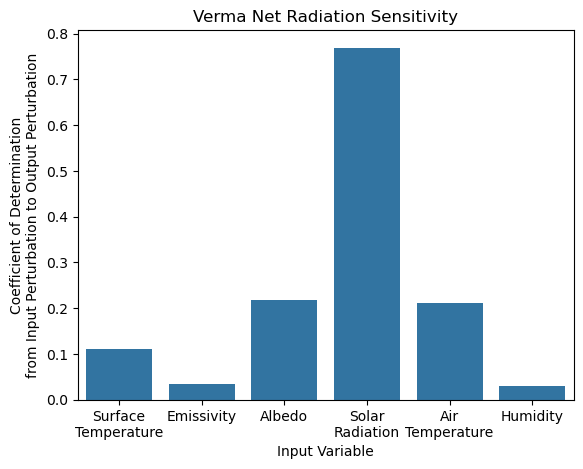

In [13]:
df = sensitivity_metrics_df
df = df[(df.output_variable == "Rn") & (df.metric == "r2")]
df = df.dropna()
df = df[df.value>0]
ax = sns.barplot(x=df.input_variable, y=df.value)
ax.set_xticklabels(["Surface\nTemperature", "Emissivity", "Albedo", "Solar\nRadiation", "Air\nTemperature", "Humidity"])
plt.xlabel("Input Variable")
plt.ylabel("Coefficient of Determination\nfrom Input Perturbation to Output Perturbation")
plt.title("Verma Net Radiation Sensitivity")